# Practical exercise 1 - Tokenizing with NLTK/SoMaJo; the distribution of tokens



# 1. Data preparation

In this exercise we use a dataset described in the following paper:

> Schmidt, T., Hartl, P., Ramsauer, D., Fischer, T., Hilzenthaler, A. & Wolff, C. (2020). Acquisition and Analysis of a Meme Corpus to Investigate Web Culture. In 15th Annual International Conference of the Alliance of Digital Humanities Organizations, DH 2020, Conference Abstracts. Ottawa, Canada.


The dataset can be found on https://github.com/lauchblatt/Memes_DH2020. The following code downloads it automatically.

In [1]:
import csv
import codecs
import urllib.request

data_url = 'https://raw.githubusercontent.com/lauchblatt/Memes_DH2020/main/Meme_Corpus%20-%20memes.csv'

texts = []
with urllib.request.urlopen(data_url) as csvfile:
    reader = csv.DictReader(codecs.iterdecode(csvfile, 'utf-8'))
    for row in reader:
        texts.append(row['text'])

# remove memes without text
texts = [text for text in texts if text!="NA" and text.strip()]

print(f'read {len(texts)} meme texts; {sum([len(text) for text in texts])} characters in total')

read 6906 meme texts; 585405 characters in total


Let us look at a few entries:

In [2]:
print('\n###\n'.join(texts[4022:4030]))

Yo dawg we heard yo like multilasers so
we put multilasers on yo multilasers so
you can fire your multilasers while you fire
your multilasers!!!!

###
mainf.cpp
50 DALl5 HEARD SOU LKE
OnPuTING.
#include
<iostream>
#include <stdlib.h>
using namespace std;
int factorial(int i)
if (1-0) return 1;
if (i>0) return i*factorial(i-1)
SO IPUTA FUNCTION SOUR FUNETION
SO YOU CRN CORPUTE邑HILE yUU CORPUTE.
Wİ

###
F SEEN C

###
YO DAWG
SO I HEARD YOU LIKE
VIDEO GAMES
GAME
Ou
陳
.
12
3

###
BABY S
FRST
IS PREGNANT
TOO!

###
LOOONG
Click to View

###
YO DAWG WE HERD YOU LIKE ARROWS SO WE PUT AN ARROW IN YO KNEE SO
YOU CAN STOP BEING AND ADVENTURER WHILE U STOP ADVENTURING

###
Why Kzibit says "yo dawg"
ALIENSH
HD
HISTORY.COM



Note: this is very strange data but should suffice for this exercise!

# 2. Data processing

## Tokenizing with SoMaJo

We can assume that every meme consists of one "sentence". To further split these into single words we have to tokenize the data.

We can use the SoMaJo tokenizer which was developed especially for social media data and is easy to use.

https://github.com/tsproisl/SoMaJo

more info on the system: https://www.aclweb.org/anthology/W16-2607.pdf

In [3]:
!pip install SoMaJo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 2.7 MB/s eta 0:00:00


In [4]:
from somajo import SoMaJo

somajo_tokenizer = SoMaJo(language="en_PTB",
                          split_camel_case=True)

In [5]:
data_tok = []
for sentence in somajo_tokenizer.tokenize_text(texts):
    data_tok.append([token.text for token in sentence])

In [6]:
print(data_tok[0])
print(data_tok[1])
print(data_tok[2])
print(data_tok[3])
print(data_tok[4])
print(data_tok[5])

['MAUI']
['Hot', 'Berks', '524', '755', 'Berks', '1084', '1266', '182', 'ratio', 'of', 'diff', '0.787878788', '0.9', '0.8', '0.7', '0.6', '0.5', 'Nostril', '(', 'L', ')', 'Nostril', '(', 'R', ')', '1127', '565', '697', '132', 'ratio', 'of', 'diff', 'y', '-0', '.', '0133x', '0.7671', 'R2', '0.2015', 'diff', '93', '0.704545455', 'Mouth', '(', 'L', 'Mouth', '(', 'Ri', ')', '546', '720', '174', '1110', 'Seriesi', 'Linear', '(', 'Series1', ')', '1235', 'ratio', 'of', 'diff', 'diff', '0.718390805', '0.3', '0.2', '0.1', 'Chin', 'forehead', '669', '39', '630', '568', '83', 'ratio', 'of', 'diff', 'clifi', '0.76984127', '4', '6', '8', '10', 'Mandible', '(', 'L', ')', 'Mandible', '(', 'Ri', '409', '1023', '1339', '316', 'ratio', 'of', 'diff', '0.718181818', '849', 'cliff', 'CONCLUSION', ':', 'PLAUSIBLE', 'Nose', '(', 'Top', ')', '288', '285', '368', '83', 'ratio', 'of', 'diff', '0.546052632', 'Nose', '(', 'Bottom', 'diff', '152', 'Eye', 'Width', '(', 'L', ')', 'X1', 'X2', 'NEA', '572', '98', '474

## Further data processing

For this kind of data, lower-casing everything seems to make sense. In general: this process deletes information and also sometimes meaning; e.g. Apple (company) and apple (fruit) can not be destinguished if we ignore case. However, generalization increases. Thus, you should take this decision conciously and be aware of its effects! 

In [7]:
data_tok = [[token.lower() for token in sentence] for sentence in data_tok]

In [8]:
print(data_tok[0])
print(data_tok[1])
print(data_tok[2])
print(data_tok[3])
print(data_tok[4])
print(data_tok[5])

['maui']
['hot', 'berks', '524', '755', 'berks', '1084', '1266', '182', 'ratio', 'of', 'diff', '0.787878788', '0.9', '0.8', '0.7', '0.6', '0.5', 'nostril', '(', 'l', ')', 'nostril', '(', 'r', ')', '1127', '565', '697', '132', 'ratio', 'of', 'diff', 'y', '-0', '.', '0133x', '0.7671', 'r2', '0.2015', 'diff', '93', '0.704545455', 'mouth', '(', 'l', 'mouth', '(', 'ri', ')', '546', '720', '174', '1110', 'seriesi', 'linear', '(', 'series1', ')', '1235', 'ratio', 'of', 'diff', 'diff', '0.718390805', '0.3', '0.2', '0.1', 'chin', 'forehead', '669', '39', '630', '568', '83', 'ratio', 'of', 'diff', 'clifi', '0.76984127', '4', '6', '8', '10', 'mandible', '(', 'l', ')', 'mandible', '(', 'ri', '409', '1023', '1339', '316', 'ratio', 'of', 'diff', '0.718181818', '849', 'cliff', 'conclusion', ':', 'plausible', 'nose', '(', 'top', ')', '288', '285', '368', '83', 'ratio', 'of', 'diff', '0.546052632', 'nose', '(', 'bottom', 'diff', '152', 'eye', 'width', '(', 'l', ')', 'x1', 'x2', 'nea', '572', '98', '474

# 3. Corpus statistics

We will use the term "frequency" of a word type to express the absolute number of times this word occurs (in any context) in our corpus.

Please note the terminological distinction:<br>
**token**: Word form occuring in a text. The sentence "This is it, is it?" has 7 tokens \['This', 'is', 'it', ',', 'is', 'it', '?'\].<br>
**type**: Unique word form in a text. The sentence "This is it, is it?" has 5 types {',', '?', 'This', 'is', 'it'}<br>
A language/vocabulary consists of several word types; a corpus consists of tokens (which are mentions/occurrences of these types).

In [31]:
# count words and their frequencies
from collections import Counter

sentences = data_tok

words = Counter(word for sentence in sentences for word in sentence)
# Note: "words" now contains a mapping of words to their frequencies.


In [36]:
# total number of types in the corpus
print(f'Total number of types (unique words): {len(words)}')

# total number of tokens in the corpus
print(f'Total number of tokens: {sum(words.values())}')

# how many words occur only once?
print(f'Number of types with frequency of occurrence 1: {len([True for word in words if words[word] == 1])}')

# show the frequency of some words
for word in ('manter', 'woman', 'computing', 'meaning', '!', '?'):
    print(f'Frequency of token "{word}": {words[word]}')

Total number of types (unique words): 20152
Total number of tokens: 112846
Number of types with frequency of occurrence 1: 12674
Frequency of token "manter": 1
Frequency of token "woman": 34
Frequency of token "computing": 0
Frequency of token "meaning": 14
Frequency of token "!": 704
Frequency of token "?": 1060


In [37]:
sorted_words = sorted(words, key=lambda word: words[word], reverse=True)

print('the most frequent words:')
print(sorted_words[:20])

print('\nsome infrequent words:')
print(sorted_words[-10:])

the most frequent words:
['the', ',', 'you', '.', 'a', 'to', 'i', 'of', 'in', '?', 'and', 'is', 'so', 'my', 'it', 'like', 'yo', 'your', '!', 'that']

some infrequent words:
['prョ', 'bigbag', 'ouu', 'favre', 'webb', 'basetgod', 'asedegod', 'lurkda', 'ank', 'manter']


In [47]:
#######################################################
### EXERCISE (see tasks at the end of the notebook) ###
#######################################################

# You should assign each word a rank according to the sorting by its frequency (i.e. the most 
# frequent word gets rank 1, the 2nd most frequent word gets rank 2, etc.).
# The "ranks" dictionary should map each word to its frequency rank.
ranks = {}
i=1
for word in sorted_words:
    ranks.update({word : i})
    i+=1
#print(ranks)

# Assign each word rank the word frequency (i.e., for example, if the word on rank 10 (= the 10th 
# most frequent word) occurs 500 times, the resulting dictionary should map 10 to 500.) 
# The "frequency_ranks" dictionary should save a mapping from ranks to frequencies.
frequency_ranks = {}
j=1
for word in sorted_words:
    frequency_ranks.update({j:words[word]})
    j+=1
    
#print(frequency_ranks)

# 4. Plotting Word Distribution

Zipf's law states that: \begin{equation}\textit{occurrence_probability}(\textit{word}) = \frac{c}{\text{rank}(\textit{word})}\end{equation}
In other words: the occurrence probability of a word is inversely proportional to its frequency rank (with a corpus specific constant c).

We can compute the occurrence probability of a word based on corpus data as follows:
\begin{equation}
    \textit{occurrence_probability}(\textit{word}) = \frac{\textit{frequency of occurrence}(\textit{word})}{\textit{number of all words}}
\end{equation}
For example, when a word occurs 20 times in a corpus of 100 tokens, its occurrence_probability is $0.2$.

Above we calculated the frequency of occurrence of each word in our data. We now want to plot this value against the rank using Zipf's law and the formulae above.

\begin{equation}
\frac{\textit{frequency of occurrence}(\textit{word})}{\textit{number of all words}} = \frac{c}{\text{rank}(\textit{word})}
\end{equation}

\begin{equation}
\textit{frequency of occurrence}(\textit{word}) = \frac{c * \textit{number of all words}}{\text{rank}(\textit{word})}
\end{equation}

Thus, if we want to plot the frequency on the y-axis, for any given rank $x$, the plot should display:
\begin{equation}
f(x) = y = \frac{c * \textit{number of all words}}{x}
\end{equation}


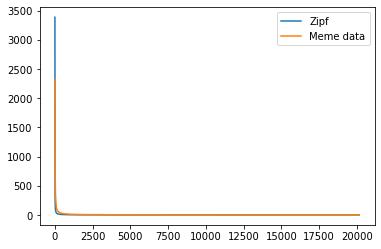

In [61]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# set the constant c to some value for now
c = 0.03

# x-axis range:
n_minimum = 1
n_limit = 20160

# plot Zipf
x_zipf = np.array(range(n_minimum, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf  # this is the last formula above
plt.plot(x_zipf, y_zipf, label='Zipf')
# Note: this is what Zipf's law claims - we did not test it with our data yet.

# here we plot the meme data (using the values from the cell above)
if frequency_ranks:
    lists = sorted(frequency_ranks.items())
    x, y = zip(*lists)
    plt.plot(x[n_minimum:n_limit], y[n_minimum:n_limit], label='Meme data')

plt.legend()
plt.show()

#5. Collocations

A collocation is "a combination of words in a language that happens very often and more frequently than would happen by chance".<br>
These combinations are especially meaningful; there usually is a strong connection between the words; the words in combination often lead a new combined meaning; strong collocations can be considered lexical items.


## 5.1 Co-occuring word pairs

We only have the frequencies of individual words so far.

To compute collocation measure we need frequencies of co-occurring word pairs.

For example, the tokenized sentence ['This', 'is', 'it', ',', 'is', 'it', '?']. has the following co-occuring word pairs:
- ('This', 'is') frequency 1
- ('is', 'it') frequency 2
- ('it', ',') frequency 1
- (',', 'is') frequency 1
- ('it', '?') frequency 1

Note that the sentence has 7 tokens, thus, 6 co-occurring word pairs (also known as bigrams), however, one of those occurs twice.

We now count these for our entire corpus.

In [14]:
from collections import Counter

all_word_pairs = Counter((word, sentence[index+1])
                         for sentence in sentences
                         for index, word in enumerate(sentence)
                         if index+1 < len(sentence))

In [ ]:
# let us look at some
print('The 10 most frequent word pairs:')
print(sorted(all_word_pairs.items(), key=lambda pair: pair[1], reverse=True)[:10])

print(f'\nThe number of unique word pairs: {len(all_word_pairs)}')

print('\nThe number of unique word pairs with a frequency greater than 1:')
print(len([pair for pair, frequency in all_word_pairs.items() if frequency > 1]))

The 10 most frequent word pairs:
[(('yo', 'dawg'), 390), (('you', 'like'), 325), (('you', 'can'), 262), (('so', 'we'), 260), (('so', 'you'), 247), ((',', 'i'), 222), (('dat', 'ass'), 216), (('while', 'you'), 201), (('heard', 'you'), 196), (('we', 'put'), 193)]

The number of unique word pairs: 64778

The number of unique word pairs with a frequency greater than 1:
13243


In [18]:
# to make it computationally feasible, only analyze word pairs with freq > some threshold
# you might have to increase this value if running the cells in 5.2 take too long to finish
threshold = 5
word_pairs = {word_pair: frequency for word_pair, frequency in all_word_pairs.items() 
              if frequency >= threshold}
print(f'number of remaining word pairs: {len(word_pairs)}')
#word_pairs

number of remaining word pairs: 1949


## 5.2 Collocation measures

Above we actually used the most basic collocation measure: the frequency $o_{11}$ of the co-occurring word pair.

Now we will compute the entire contingency table for each of the co-occuring word pairs (this might take a few seconds).

In [19]:
from collections import defaultdict

o11 = word_pairs
o12 = defaultdict(int)
o21 = defaultdict(int)
o22 = defaultdict(int)

for word_pair in word_pairs:
    word1, word2 = word_pair
    for other_word_pair in word_pairs:
        other_word1, other_word2 = other_word_pair
        if word1 == other_word1:
            if word2 != other_word2:
                o12[word_pair] += word_pairs[other_word_pair]
            else:
                # we already have this case in word_pairs
                pass
        else:
            if word2 == other_word2:
                o21[word_pair] += word_pairs[other_word_pair]
            else:
                o22[word_pair] += word_pairs[other_word_pair]

# set min value to 1
for pair in word_pair:
    for cell in (o12, o21, o22):
        if not cell[word_pair]:
            cell[word_pair] = 1

contingency_tables = {'o11': o11, 'o12': o12, 'o21': o21, 'o22': o22}

In [20]:
# A function to print highest ranked collocations, using a given collocation measure to compute ranking
def print_highest_ranked_collocations(measure, top=10, tables=contingency_tables):
    for pair in sorted(tables['o11'], key=lambda word_pair: measure(word_pair, tables), reverse=True)[:top]:
        print((pair, tables['o11'][pair]))

In [21]:
def frequency(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    return pair_o11

print_highest_ranked_collocations(frequency, top=20)

(('yo', 'dawg'), 390)
(('you', 'like'), 325)
(('you', 'can'), 262)
(('so', 'we'), 260)
(('so', 'you'), 247)
((',', 'i'), 222)
(('dat', 'ass'), 216)
(('while', 'you'), 201)
(('heard', 'you'), 196)
(('we', 'put'), 193)
(('in', 'the'), 189)
(('of', 'the'), 185)
(('put', 'a'), 173)
(('i', 'heard'), 148)
((',', 'so'), 146)
(('dawg', ','), 142)
(('i', "'m"), 138)
(('in', 'your'), 135)
(('dawg', 'i'), 135)
(('i', 'herd'), 127)


In [45]:
import math

# mutual information
def mi(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return math.log(pair_o11/pair_e11)

print_highest_ranked_collocations(mi, top=20)

(('fall', 'asleep'), 5)
(('days', 'later'), 5)
(('forever', 'alone'), 5)
(('little', 'pony'), 5)
(('best', 'friend'), 5)
(('birthday', 'party'), 5)
(('nice', 'gane'), 5)
(('runs', 'marathon'), 5)
(('aliensh', 'hd'), 5)
(('ze', 'urger.com'), 5)
(('tap', '*'), 5)
(('onion', 'ring'), 5)
(('profile', 'pictures'), 5)
(('highest', 'place'), 5)
(('something', 'sharp'), 5)
(('page', 'contents'), 5)
(('contents', 'featured'), 5)
(('current', 'events'), 5)
(('events', 'random'), 5)
(('random', 'article'), 5)


# 6. Exercises

1.   Plotting your distribution

    1.   Assign each word a rank according to the sorting by its frequency (i.e. the most frequent word gets rank 1, the 2nd most frequent word gets rank 2, etc.).

    2.   Assign each word rank the word frequency (i.e., for example, if the word on rank 10 (= the 10th most frequent word) occurs 500 times, the resulting dictionary should map 10 to 500.) You should save the result in the variable 'frequency_ranks', see above.

    3.   Plot your distribution together with Zipf's Law (if you defined the variable 'frequency_ranks' correctly, the code in 4. should do that). Modify the constant 'c' so the Zipf-plot fits to your data (approximately). You might also have to modify n_minimum and n_limit slightly so you can see it better.

2.   Collocations

    1.   Compare the number of unique word pairs to the number of unique words in our data. What do you observe? Is this expected? Why?
    2.   Would you expect the distribution of unique word pairs also to follow Zipf’s law? Why (not)?
    3.   Look at the top results extracted using the frequency measure. Do you think the definition of a collocation holds for these word pairs? Are these really collocations? Why (not)? What are issues when using just the frequency of word pairs as collocation measure?
    4.   **(This is the main task of this exercise!)** Familiarize yourself with the language in this meme dataset. Write down 10 collocations for this data, i.e. pairs of words which you think are very strongly connected here (they do not really occur in other context and have a special meaning together). Implement a few (at least 5 in total) other collocation measures (http://collocations.de/AM/index.html). Which of these measures predicts the most of your 10 collocations in its top 100 results?



## Answers


### 1A - Assign each word a rank according to its frequency.



In [62]:
#The "ranks" dictionary  map each word to its frequency rank.
ranks = {}
i=1
for word in sorted_words: #sorted words contain all the words sorted by its frequency
    ranks.update({word : i})
    i+=1
#print(ranks)

### 1B - Assign each word rank , the word frequency

In [63]:
# The "frequency_ranks" dictionary  save a mapping from ranks to frequencies.
frequency_ranks = {}
j=1

#taking the frequency of words from words dict, using the sorted order
for word in sorted_words:
    frequency_ranks.update({j:words[word]})
    j+=1
    
#print(frequency_ranks)

### 1C - Plotting distribution together with Zipf's Law

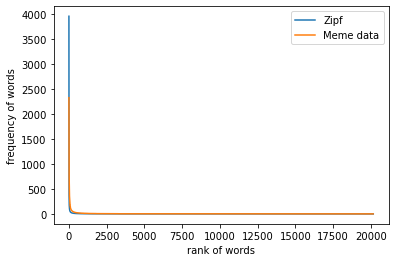

In [68]:
# set the constant c to value which fits the lines
c = 0.035

# x-axis range:
n_minimum = 1
n_limit = 20160

# plot Zipf
x_zipf = np.array(range(n_minimum, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf  # this is the last formula above
plt.plot(x_zipf, y_zipf, label='Zipf')
# Note: this is what Zipf's law claims - we did not test it with our data yet.

# here we plot the meme data (using the values from the cell above)
if frequency_ranks:
    lists = sorted(frequency_ranks.items())
    x, y = zip(*lists)
    plt.plot(x[n_minimum:n_limit], y[n_minimum:n_limit], label='Meme data')

plt.xlabel("rank of words")
plt.ylabel("frequency of words")
plt.legend()
plt.show()

We observe that the orange line fits with the blue line for c =0.035. We see that the rank 1 has freq< 5000. 

Hence Zipf's law holds. 

### 2A -  Comparison of number of unique word pairs and number of unique words



In [70]:
print(f'\nThe number of unique word pairs: {len(all_word_pairs)}')
print(f'Total number of types (unique words): {len(words)}')



The number of unique word pairs: 64778
Total number of types (unique words): 20152


We observe that the number unique word pairs is three times the number of unique words. This is an expected scenario as the number of unique word pairs will be greater than the number of words. Many unique combinations are possible. The total unique pairs possible from 20152 words are 203041476.

### 2B - Does the unique word pairs follow Zipf's law

Yes, the unique word pairs will also follow Zipf's law. The number of word pair with higher frequency will be less.

Reference paper: https://aclanthology.org/C02-1117.pdf

### 2C - Issues of using frequency as Collocation measure

Collocation definition does not hold for the word pairs extracted using frequency measure. These word pairs are not meaningful, i.e, does not make a useful phrase. Hence they are not really collocation. They are just words which were adjacent to each other many times. Thus it doesnot contribute to the meaning or have contextual properties.

### 2D - Implementing 5 collocation measures 

Ten meaningful collolaction are - 
('fall', 'asleep')
('days', 'later')
('forever', 'alone')
('little', 'pony')
('best', 'friend')
('birthday', 'party')
('justin', 'bieber')
('hours', 'ago')
('runs', 'marathon')
('ice', 'cream')


In [87]:
 
def poisson(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    x =  math.log(pair_o11) - math.log(pair_e11) - 1
    return pair_o11*x

print_highest_ranked_collocations(poisson, top=20)

(('yo', 'dawg'), 390)
(('dat', 'ass'), 216)
(('so', 'we'), 260)
(('we', 'put'), 193)
(('you', 'like'), 325)
(('you', 'can'), 262)
(('.', 'ne'), 108)
(('hours', 'ago'), 90)
(('based', 'god'), 74)
(('heard', 'you'), 196)
(('while', 'you'), 201)
(('put', 'a'), 173)
(('do', "n't"), 125)
(('i', "'m"), 138)
(('memegenerator', '.'), 97)
(('i', 'heard'), 148)
(('dawg', ','), 142)
(('i', 'herd'), 127)
(('grumpy', 'cat'), 45)
(('minutes', 'ago'), 54)


In [88]:
def dice(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    x =  pair_R1 + pair_C1
    return 2*pair_o11 / x

print_highest_ranked_collocations(dice, top=20)

(('fravrit', 'berks'), 7)
(('cheez', 'burger'), 9)
(('justin', 'bieber'), 12)
(('scumbag', 'steve'), 16)
(('fall', 'asleep'), 5)
(('blake', 'boston'), 10)
(('juliana', 'tamara'), 8)
(('days', 'later'), 5)
(('ice', 'cream'), 6)
(('forever', 'alone'), 5)
(('little', 'pony'), 5)
(('best', 'friend'), 5)
(('birthday', 'party'), 5)
(('hide', 'report'), 7)
(('nice', 'gane'), 5)
(('runs', 'marathon'), 5)
(('ridiculously', 'photogenic'), 15)
(('anonymous', '08/18/11'), 8)
(('tide', 'goes'), 10)
(('neil', 'armstrong'), 6)


In [89]:
def chi_squared(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_R2 = pair_o21 + pair_o22
    pair_C1 = pair_o11 + pair_o21
    pair_C2 = pair_o12 + pair_o22
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    pair_e22 = pair_R2 * pair_C2 / float(pair_N)
    
    
    x =  pow((pair_o11 - pair_e11),2)*pair_N
    return x/( pair_e11*pair_e22)

print_highest_ranked_collocations(chi_squared, top=20)

(('blake', 'boston'), 10)
(('tide', 'goes'), 10)
(('28', '29'), 10)
(('29', '30'), 10)
(('cheez', 'burger'), 9)
(('cutie', 'mark'), 9)
(('19', '20'), 13)
(('fanny', 'fanny'), 14)
(('justin', 'bieber'), 12)
(('fall', 'asleep'), 5)
(('juliana', 'tamara'), 8)
(('days', 'later'), 5)
(('ice', 'cream'), 6)
(('forever', 'alone'), 5)
(('little', 'pony'), 5)
(('best', 'friend'), 5)
(('birthday', 'party'), 5)
(('nice', 'gane'), 5)
(('runs', 'marathon'), 5)
(('ridiculously', 'photogenic'), 15)


In [90]:
def mi3(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    x =  pow(pair_o11,3)/pair_e11
    return math.log(x)

print_highest_ranked_collocations(mi3, top=20)

(('yo', 'dawg'), 390)
(('dat', 'ass'), 216)
(('we', 'put'), 193)
(('so', 'we'), 260)
(('based', 'god'), 74)
(('hours', 'ago'), 90)
(('you', 'like'), 325)
(('.', 'ne'), 108)
(('you', 'can'), 262)
(('grumpy', 'cat'), 45)
(('big', 'chungus'), 37)
(('portable', 'atrocities'), 30)
(('encapsulated', 'en'), 24)
(('heard', 'you'), 196)
(('has', 'cheezburger'), 49)
(('while', 'you'), 201)
(('minutes', 'ago'), 54)
(('put', 'a'), 173)
(('do', "n't"), 125)
(('scumbag', 'steve'), 16)


In [91]:
def jaccard(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    x =  pair_o11 + pair_o12 + pair_o21
    return pair_o11 / x

print_highest_ranked_collocations(jaccard, top=20)

(('fravrit', 'berks'), 7)
(('cheez', 'burger'), 9)
(('justin', 'bieber'), 12)
(('scumbag', 'steve'), 16)
(('fall', 'asleep'), 5)
(('blake', 'boston'), 10)
(('juliana', 'tamara'), 8)
(('days', 'later'), 5)
(('ice', 'cream'), 6)
(('forever', 'alone'), 5)
(('little', 'pony'), 5)
(('best', 'friend'), 5)
(('birthday', 'party'), 5)
(('hide', 'report'), 7)
(('nice', 'gane'), 5)
(('runs', 'marathon'), 5)
(('ridiculously', 'photogenic'), 15)
(('anonymous', '08/18/11'), 8)
(('tide', 'goes'), 10)
(('neil', 'armstrong'), 6)


We can observe that the measures dice and Jaccard produce the most meaningful results in their top 20. Then comes chi_squared and then $mi^3$ and poisson
